Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina con el uso de un framework. (Portafolio Implementación).

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


Fabián Erubiel Rojas Yañez
A01706636

In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks"
!ls  # show current directory

import pandas as pd
# Cargar el dataset
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/bank_preprocessedV3.csv')

/content/gdrive/MyDrive/Colab Notebooks
 07-Septiembre.ipynb
 31deagosto.ipynb
 Actividad3SemTec.ipynb
 Act-K-means.ipynb
 Act-regresion.ipynb
 ActVisualizacion.ipynb
 AirQualityUCI.csv
 AirQualityUCI.xlsx
 ATCEstadisticaBasica.ipynb
 bank.csv
 bank-full.csv
 bank_preprocessed.csv
 bank_preprocessedV2.csv
 bank_preprocessedV3.csv
 BuenoEntrega1_SinFramework.ipynb
 car.data
 CArDataset.ipynb
'Copia de Act-K-means.ipynb'
'Copia de ActVisualizacion.ipynb'
'Copia de ATCEstadisticaBasica (1).ipynb'
'Copia de ATCEstadisticaBasica.ipynb'
'Copia de Dataset'
 CopiadeEnsembleMethod_RandomForest.ipynb
'Copia de Entrega1_SinFramework.ipynb'
'Copia de Forest.ipynb'
'Copia de Hierarchical Clustering.ipynb'
'Copia de HW1_DSP_DFT-1.ipynb'
'Copia de io2023_workshop (1).ipynb'
'Copia de io2023_workshop.ipynb'
'Copia de KMeans sklearn blobs.ipynb'
'Copia de KMeans sklearn pipeline Cancer Genome Dataset.ipynb'
'Copia de KMeans vs DBSCAN  sklearn moons evaluation ari metric .ipynb'
'Copia de Loading Data s

Precisión en los datos de prueba: 0.8054408728988499
Matriz de confusión:
[[9647 2330]
 [ 309 1278]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11977
           1       0.35      0.81      0.49      1587

    accuracy                           0.81     13564
   macro avg       0.66      0.81      0.69     13564
weighted avg       0.90      0.81      0.83     13564

AUC: 0.8741863671806585


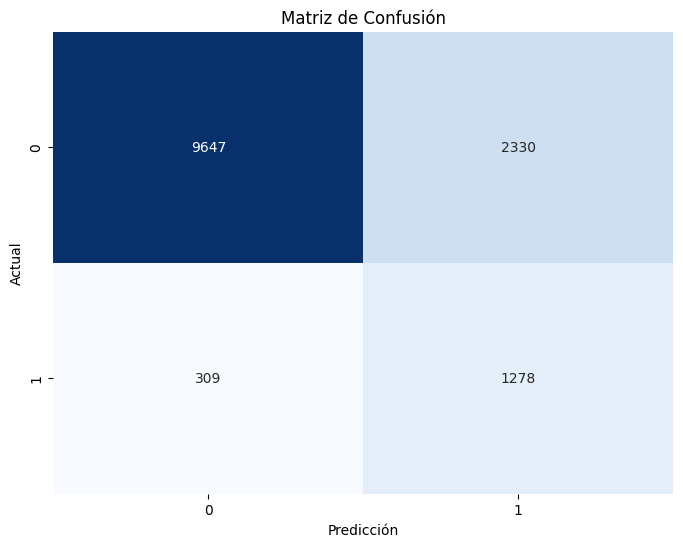

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Preparar las características (X) y la variable objetivo (y)
X = df.drop(columns=['y']).values
y = df['y'].values

# Verificar tipos de datos
X = X.astype(np.float64)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Sobremuestreo con SMOTE combinado con submuestreo (SMOTEENN)
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Definir y entrenar el modelo Random Forest con hiperparámetros predefinidos
rf_classifier = RandomForestClassifier(
    n_estimators=200,        # Número de árboles en el bosque
    max_depth=15,            # Profundidad máxima de los árboles
    min_samples_split=10,    # Mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=2,      # Mínimo de muestras por hoja
    class_weight='balanced', # Penalización para clases desbalanceadas
    random_state=0
)

# Entrenar el modelo
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluación en el conjunto de prueba
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
y_pred = rf_classifier.predict(X_test)

# Métricas de desempeño
accuracy_test = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Precisión en los datos de prueba: {accuracy_test}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(classification_rep)
print(f"AUC: {auc}")

# Graficar la curva Precision-Recall
#precision, recall, _ = precision_recall_curve(y_test, y_prob)
#plt.plot(recall, precision, label='Precision-Recall Curve')
#plt.xlabel('Recall')
#plt.ylabel('Precision')
#plt.title('Precision-Recall Curve')
#plt.legend()
#plt.show()

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()


In [5]:
import pandas as pd

#Función para ingresar los datos manualmente
def input_data_manual():
    #Diccionario para almacenar los valores de entrada
    user_data = {}

    #Variables binarias
    while True:
        value = input("¿Tienes hipoteca? (1: Sí, 0: No): ")
        try:
            value = int(value)
            if value in [0, 1]:
                user_data["housing"] = value
                break
            else:
                print("Por favor ingresa 1 para Sí o 0 para No.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa 1 o 0.")

    while True:
        value = input("¿Tienes préstamo personal? (1: Sí, 0: No): ")
        try:
            value = int(value)
            if value in [0, 1]:
                user_data["loan"] = value
                break
            else:
                print("Por favor ingresa 1 para Sí o 0 para No.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa 1 o 0.")

    #Datos categóricos
    jobs = ["Management", "Other", "Student", "Technical", "Unemployed", "Unskilled"]
    print("\nOpciones de empleo:")
    for i, job in enumerate(jobs, 1):
        print(f"{i}: {job}")

    while True:
        selected_job = input("Selecciona tu empleo (ingresa solo el número): ")
        try:
            selected_job = int(selected_job)
            if selected_job in range(1, len(jobs) + 1):
                break
            else:
                print(f"Por favor ingresa un número entre 1 y {len(jobs)}.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa un número válido.")

    #Asignar 1 al empleo seleccionado y 0 a los demás empleos
    for i, job in enumerate(jobs, 1):
        user_data[f"job_{job}"] = (i == selected_job)

    #Preguntar el balance anual (sueldo en euros)
    while True:
        balance = input("Ingresa tu balance anual (sueldo en euros): ")
        try:
            balance = float(balance)
            user_data["balance_winsorized"] = balance
            break
        except ValueError:
            print("Entrada inválida. Por favor ingresa un número decimal.")

    #Preguntar al cleinte si ha tenido contactos previos
    while True:
        has_previous_contacts = input("¿Has tenido contactos previos con el banco? (1: Sí, 0: No): ")
        try:
            has_previous_contacts = int(has_previous_contacts)
            if has_previous_contacts in [0, 1]:
                break
            else:
                print("Por favor ingresa 1 para Sí o 0 para No.")
        except ValueError:
            print("Entrada inválida. Por favor ingresa 1 o 0.")

    if has_previous_contacts == 1:
        #Si el cliente ha tenido contactos previos, preguntar detalles.
        while True:
            value = input("¿Cuántos contactos previos has tenido con el banco? ")
            try:
                value = int(value)
                user_data["contact_prev"] = value
                break
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número entero.")

        while True:
            value = input("Duración total de los contactos previos (en segundos): ")
            try:
                value = float(value)
                user_data["duration_winsorized"] = value
                break
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número decimal.")

        while True:
            value = input("¿Cuántos de esos contactos fueron exitosos? ")
            try:
                value = float(value)
                user_data["previous_winsorized"] = value
                break
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número decimal.")

        #Recopilar informacion sobre los contatos previos establecidos
        outcomes = ["failure", "other", "success", "unknown"]
        print("\nSelecciona el resultado previo de la campaña:")
        for i, outcome in enumerate(outcomes, 1):
            print(f"{i}: {outcome}")

        while True:
            selected_outcome = input("Elije una opción (número): ")
            try:
                selected_outcome = int(selected_outcome)
                if selected_outcome in range(1, len(outcomes) + 1):
                    break
                else:
                    print(f"Por favor ingresa un número entre 1 y {len(outcomes)}.")
            except ValueError:
                print("Entrada inválida. Por favor ingresa un número válido.")

        #Asignar 1 al resultado seleccionado y 0 a los demás
        for i, outcome in enumerate(outcomes, 1):
            user_data[f"poutcome_{outcome}"] = (i == selected_outcome)
    else:
        #Si no tiene contactos previos, establecer las demas preguntas en 0
        user_data["contact_prev"] = 0
        user_data["duration_winsorized"] = 0.0
        user_data["previous_winsorized"] = 0.0
        outcomes = ["failure", "other", "success", "unknown"]
        for outcome in outcomes:
            user_data[f"poutcome_{outcome}"] = False

    #Convertir a DataFrame
    user_df = pd.DataFrame([user_data])
    return user_df


In [6]:
user_df = input_data_manual()

#Reorganizar las columnas de user_df para que coincidan con las del dataframe X
columns_X = ['housing', 'loan', 'job_Management', 'job_Other', 'job_Student',
             'job_Technical', 'job_Unemployed', 'job_Unskilled',
             'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown',
             'contact_prev', 'balance_winsorized', 'duration_winsorized', 'previous_winsorized']

#Reorganizar user_df igual que el datframe X
user_df = user_df[columns_X]

#Convertir a formato NumPy
user_input = user_df.values.astype(np.float64)
1
#Probar el modeo con los datos ingresados del usuario
user_prediction = rf_classifier.predict(user_input)

#Mostrar resultados
if user_prediction[0] == 1:
    print("El modelo predice que el cliente SI SE SUSCRIBIRÁ un depósito a plazo con el banco.")
else:
    print("El modelo predice que el cliente NO SE SUSCRIBIRÁ a un depósito a plazo con el banco.")

¿Tienes hipoteca? (1: Sí, 0: No): 1
¿Tienes préstamo personal? (1: Sí, 0: No): 1

Opciones de empleo:
1: Management
2: Other
3: Student
4: Technical
5: Unemployed
6: Unskilled
Selecciona tu empleo (ingresa solo el número): 1
Ingresa tu balance anual (sueldo en euros): 1000
¿Has tenido contactos previos con el banco? (1: Sí, 0: No): 0
El modelo predice que el cliente NO SE SUSCRIBIRÁ a un depósito a plazo con el banco.
